In [22]:
%matplotlib inline
import numpy as np
from scipy.special import sici
import matplotlib.pylab as plt
from scipy.integrate import quad, trapz

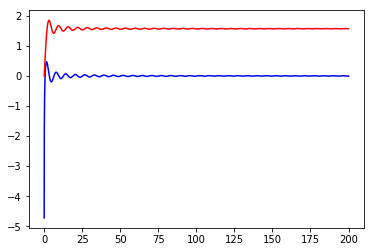

In [23]:
k_limit = 200
steps = 40001
k = np.linspace(0,k_limit,steps)
d = k_limit/steps
e = sici(k)
f_real = e[1]
f_imag = e[0]
plt.plot(k,f_real,"b")
plt.plot(k,f_imag,"r")

/Users/hstrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  
/Users/hstrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


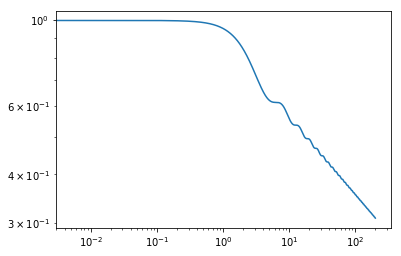

In [31]:
prefactor = 0.2
er = np.exp(-prefactor*np.euler_gamma)*np.exp(prefactor*f_real)*k**(-prefactor)
ei1 = np.cos(prefactor*f_imag)
ei2 = np.sin(prefactor*f_imag)
er[0]=1
plt.loglog(k,er)

[-0.50053178 -0.28605998]


/Users/hstrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/hstrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  


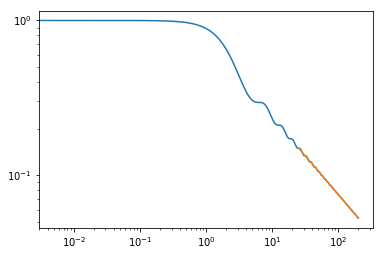

In [25]:
logk = np.log(k)
loger = np.log(er)
k_limit = 5000
p=np.polyfit(logk[k_limit:],loger[k_limit:],1)
print(p)
erfit = np.exp(p[1])*k**p[0]
plt.loglog(k,er)
plt.loglog(k[k_limit:],erfit[k_limit:])

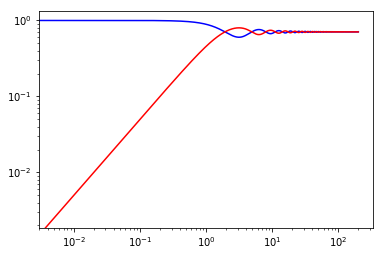

In [26]:
plt.loglog(k,ei1,"b")
plt.loglog(k,ei2,"r")

(80001,)
(80001,)


Text(0,0.5,'p(I)')

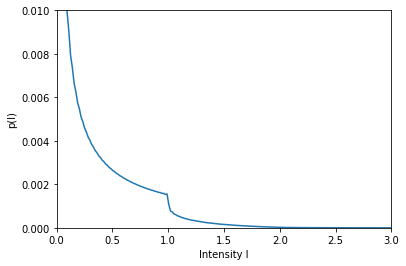

In [32]:
# need to find the proper way of doing an fft
freq = np.fft.fftfreq(2*steps-1,d)*2*np.pi
fc1 = er*ei1+1j*er*ei2
fc2 = er*ei1-1j*er*ei2
fc2 = np.conj(fc2[::-1])
fc = np.concatenate((fc1,fc2[1:]))
print(fc.shape)
cf_fft = np.fft.ifft(fc)
print(cf_fft.shape)
disp = 2000
plt.plot(freq[:disp],np.real(cf_fft[:disp]))
plt.xlim((0,3))
plt.ylim((0,0.01))
plt.xlabel("Intensity I")
plt.ylabel("p(I)")
#plt.savefig("pIanalytic5.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [33]:
# normalization
print(np.real(cf_fft[:steps]).mean()*freq[steps-1])

0.010720489375025007


In [37]:
# normalization
print(1/trapz(np.real(cf_fft[:steps]),dx=(freq[1]-freq[0])))

127.59105319391485


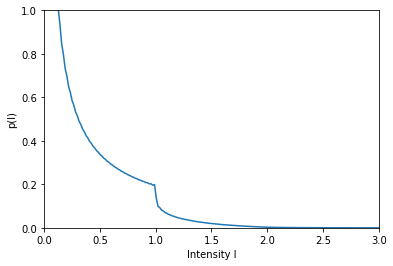

In [38]:
plt.plot(freq[:disp],np.real(cf_fft[:disp])/trapz(np.real(cf_fft[:steps]),dx=(freq[1]-freq[0])))
plt.xlim((0,3))
plt.ylim((0,1))
plt.xlabel("Intensity I")
plt.ylabel("p(I)")
plt.savefig("pIanalyticTwo02.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

(80001,)
(80001,)


/Users/hstrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  
/Users/hstrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


Text(0,0.5,'p(I)')

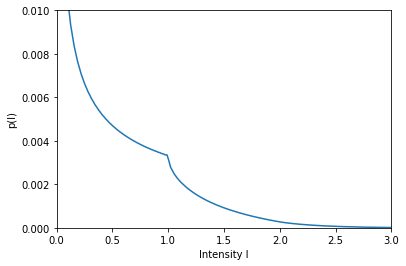

In [39]:
prefactor = 0.5
er = np.exp(-prefactor*np.euler_gamma)*np.exp(prefactor*f_real)*k**(-prefactor)
ei1 = np.cos(prefactor*f_imag)
ei2 = np.sin(prefactor*f_imag)
er[0]=1

# need to find the proper way of doing an fft
freq = np.fft.fftfreq(2*steps-1,d)*2*np.pi
fc1 = er*ei1+1j*er*ei2
fc2 = er*ei1-1j*er*ei2
fc2 = np.conj(fc2[::-1])
fc = np.concatenate((fc1,fc2[1:]))
print(fc.shape)
cf_fft = np.fft.ifft(fc)
print(cf_fft.shape)
disp = 2000
plt.plot(freq[:disp],np.real(cf_fft[:disp]))
plt.xlim((0,3))
plt.ylim((0,0.01))
plt.xlabel("Intensity I")
plt.ylabel("p(I)")

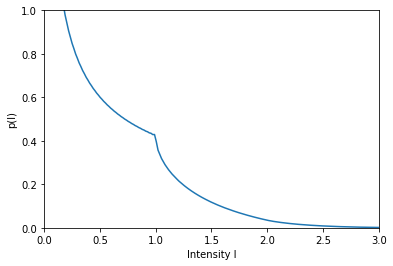

In [40]:
plt.plot(freq[:disp],np.real(cf_fft[:disp])/trapz(np.real(cf_fft[:steps]),dx=(freq[1]-freq[0])))
plt.xlim((0,3))
plt.ylim((0,1))
plt.xlabel("Intensity I")
plt.ylabel("p(I)")
plt.savefig("pIanalyticTwo05.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

(80001,)
(80001,)


/Users/hstrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  
/Users/hstrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


Text(0,0.5,'p(I)')

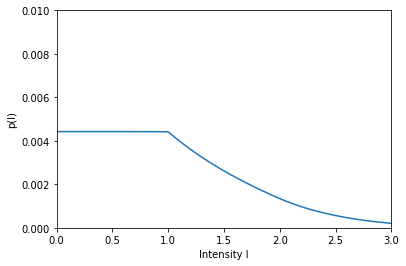

In [57]:
prefactor = 1
er = np.exp(-prefactor*np.euler_gamma)*np.exp(prefactor*f_real)*k**(-prefactor)
ei1 = np.cos(prefactor*f_imag)
ei2 = np.sin(prefactor*f_imag)
er[0]=1

# need to find the proper way of doing an fft
freq = np.fft.fftfreq(2*steps-1,d)*2*np.pi
fc1 = er*ei1+1j*er*ei2
fc2 = er*ei1-1j*er*ei2
fc2 = np.conj(fc2[::-1])
fc = np.concatenate((fc1,fc2[1:]))
print(fc.shape)
cf_fft = np.fft.ifft(fc)
print(cf_fft.shape)
disp = 2000
plt.plot(freq[:disp],np.real(cf_fft[:disp]))
plt.xlim((0,3))
plt.ylim((0,0.01))
plt.xlabel("Intensity I")
plt.ylabel("p(I)")

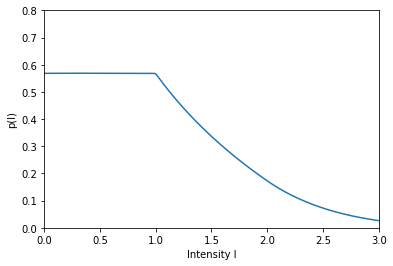

In [58]:
plt.plot(freq[:disp],np.real(cf_fft[:disp])/trapz(np.real(cf_fft[:steps]),dx=(freq[1]-freq[0])))
plt.xlim((0,3))
plt.ylim((0,0.8))
plt.xlabel("Intensity I")
plt.ylabel("p(I)")
plt.savefig("pIanalyticTwo1.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [60]:
pI1 = np.real(cf_fft[:disp])/trapz(np.real(cf_fft[:steps]))
I1 = freq[:disp]

(80001,)
(80001,)


/Users/hstrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  
/Users/hstrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


Text(0,0.5,'p(I)')

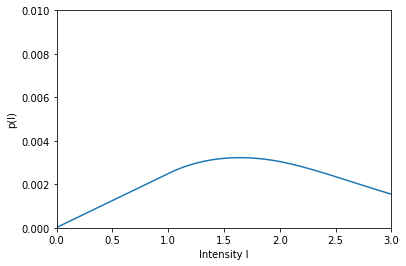

In [61]:
prefactor = 2
er = np.exp(-prefactor*np.euler_gamma)*np.exp(prefactor*f_real)*k**(-prefactor)
ei1 = np.cos(prefactor*f_imag)
ei2 = np.sin(prefactor*f_imag)
er[0]=1

# need to find the proper way of doing an fft
freq = np.fft.fftfreq(2*steps-1,d)*2*np.pi
fc1 = er*ei1+1j*er*ei2
fc2 = er*ei1-1j*er*ei2
fc2 = np.conj(fc2[::-1])
fc = np.concatenate((fc1,fc2[1:]))
print(fc.shape)
cf_fft = np.fft.ifft(fc)
print(cf_fft.shape)
disp = 2000
plt.plot(freq[:disp],np.real(cf_fft[:disp]))
plt.xlim((0,3))
plt.ylim((0,0.01))
plt.xlabel("Intensity I")
plt.ylabel("p(I)")

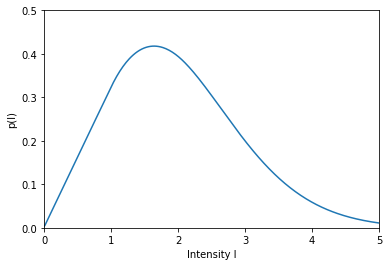

In [48]:
plt.plot(freq[:disp],np.real(cf_fft[:disp])/trapz(np.real(cf_fft[:steps]),dx=(freq[1]-freq[0])))
plt.xlim((0,5))
plt.ylim((0,0.5))
plt.xlabel("Intensity I")
plt.ylabel("p(I)")
plt.savefig("pIanalyticTwo2.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [62]:
pI2 = np.real(cf_fft[:disp])/trapz(np.real(cf_fft[:steps]))
I2 = freq[:disp]

(80001,)
(80001,)


/Users/hstrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  
/Users/hstrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


Text(0,0.5,'p(I)')

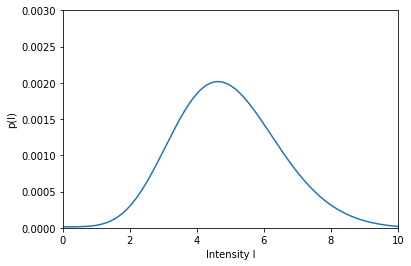

In [53]:
prefactor = 5
er = np.exp(-prefactor*np.euler_gamma)*np.exp(prefactor*f_real)*k**(-prefactor)
ei1 = np.cos(prefactor*f_imag)
ei2 = np.sin(prefactor*f_imag)
er[0]=1

# need to find the proper way of doing an fft
freq = np.fft.fftfreq(2*steps-1,d)*2*np.pi
fc1 = er*ei1+1j*er*ei2
fc2 = er*ei1-1j*er*ei2
fc2 = np.conj(fc2[::-1])
fc = np.concatenate((fc1,fc2[1:]))
print(fc.shape)
cf_fft = np.fft.ifft(fc)
print(cf_fft.shape)
disp = 2000
plt.plot(freq[:disp],np.real(cf_fft[:disp]))
plt.xlim((0,10))
plt.ylim((0,0.003))
plt.xlabel("Intensity I")
plt.ylabel("p(I)")

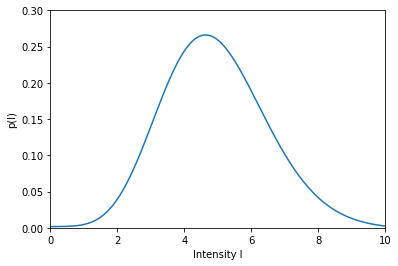

In [55]:
plt.plot(freq[:disp],np.real(cf_fft[:disp])/trapz(np.real(cf_fft[:steps]),dx=(freq[1]-freq[0])))
plt.xlim((0,10))
plt.ylim((0,0.3))
plt.xlabel("Intensity I")
plt.ylabel("p(I)")
plt.savefig("pIanalyticTwo5.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

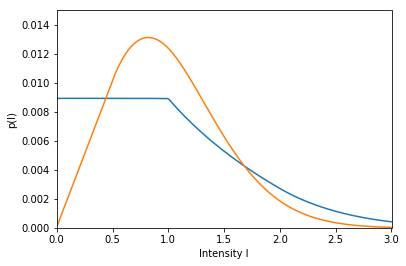

In [68]:
# Now lets compare two concentrations with two different brightness so that the total intensity is the same
plt.plot(I1,pI1)
plt.plot(I2*0.5,2*pI2)
plt.xlim((0,3))
plt.ylim((0,0.015))
plt.xlabel("Intensity I")
plt.ylabel("p(I)")
plt.savefig("pIanalyticTwo1and2.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")